In [1]:
# importing libraries

# libraries for file manipulation
import pandas as pd
import numpy as np

# libraries for easier visualisation
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# libraries for dimensionality reduction
import scipy.stats as stats
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import umap

# setting options
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
# importing dataset
df_orig = pd.read_csv("D:\Documents\Studijos\ML\star_classification.csv", delimiter=',')

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\edvar\AppData\Local\Temp\ipykernel_32716\2958153930.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_orig = pd.read_csv("D:\Documents\Studijos\ML\star_classification.csv", delimiter=',')


Darbo tikslas – Taikant dimensijos mažinimo metodus daugiamačių duomenų vizualizavimui, pateikti pasirinktos aibės vizualizavimo rezultatus ir gautų rezultatų interpretaciją. Ištirti dimensijos mažinimo metodų galimybes, atlikti lyginamąją analizę.

1.Išsirinkti duomenų aibę +

2.Pateikti pasirinktos aibės aprašomąją statistiką, aprašyti duomenų aibės specifiką. +

3.Sunormuokite duomenų aibę pagal vidurkį ir dispersiją arba min-man metodu. +

4.Sumažinkite duomenų aibės dimensiją iki dim=2, naudojant tris arba du pasirinktus dimensijos mažinimo metodus. Tai padarykite su normuota ir nenormuota duomenų aibe. Ištirkite, kaip keičiasi vizualizavimo rezultatai, keičiant algoritmų parametrus. Kiekvienas grupės narys tiria po vieną pasirinktą metodą.

5.Vizualizuokite rezultatus naudodami taškinius grafikus, klases arba klasterius vizualizuodami skirtingomis spalvomis. Įvertinkite gautus rezultatus, padarykite išvadas, kuris metodas geriau atvaizduoja duomenų imtį, pateikia daugiau informacijos. Naudokite MDS, PCA, t-SNE ar kitais metodais gautas koordinates.+-
 
6.Apibendrinkite gautus rezultatus, kokios ryškėja tendencijos? Kokias įžvalgas galite pateikti, kokias hipotezes galite iškelti atlikę vizualią analizę.-

7.Įvardinti tirtų dimensijos mažinimo metodų privalumus ir trūkumus.-


## Data description

In [3]:
df_orig.shape

(100000, 18)

In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
df_orig.describe()

obj_ID         alpha         delta             u  \
count              100000.000000 100000.000000 100000.000000 100000.000000   
mean  1237664721814903296.000000    177.629117     24.135305     21.980468   
std         8438559894562.676758     96.502241     19.644665     31.769291   
min   1237645942904389888.000000      0.005528    -18.785328  -9999.000000   
25%   1237659161195119360.000000    127.518222      5.146771     20.352353   
50%   1237663463144292864.000000    180.900700     23.645922     22.179135   
75%   1237668350286447104.000000    233.895005     39.901550     23.687440   
max   1237680531356386304.000000    359.999810     83.000519     32.781390   

                  g             r             i             z        run_ID  \
count 100000.000000 100000.000000 100000.000000 100000.000000 100000.000000   
mean      20.531387     19.645762     19.084854     18.668810   4481.366060   
std       31.750292      1.854760      1.757895     31.728152   1964.764593   
min    -9999.000000      9.822070      9.469903  -9999.000000    109.000000   
25%       18.965230     18.135828     17.732285     17.460677   3187.000000   
50%       21.099835     20.125290     19.405145     19.004595   4188.000000   
75%       22.123767     21.044785     20.396495     19.921120   5326.000000   
max       31.602240     29.571860     32.141470     29.383740   8162.000000   

           rerun_ID       cam_col      field_ID                 spec_obj_ID  \
count 100000.000000 100000.000000 100000.000000               100000.000000   
mean     301.000000      3.511610    186.130520  5783882297552056320.000000   
std        0.000000      1.586912    149.011073  3324016169583855104.000000   
min      301.000000      1.000000     11.000000   299519089380976640.000000   
25%      301.000000      2.000000     82.000000  2844137590766986752.000000   
50%      301.000000      4.000000    146.000000  5614883135353542656.000000   
75%      301.000000      5.000000    241.000000  8332144107427485696.000000   
max      301.000000      6.000000    989.000000 14126940609093851136.000000   

           redshift         plate           MJD      fiber_ID  
count 100000.000000 100000.000000 100000.000000 100000.000000  
mean       0.576661   5137.009660  55588.647500    449.312740  
std        0.730707   2952.303351   1808.484233    272.498404  
min       -0.009971    266.000000  51608.000000      1.000000  
25%        0.054517   2526.000000  54234.000000    221.000000  
50%        0.424173   4987.000000  55868.500000    433.000000  
75%        0.704154   7400.250000  56777.000000    645.000000  
max        7.011245  12547.000000  58932.000000   1000.000000

In [10]:
# there is no null values/empty cells
df_orig.isna().sum().sum()

0

In [7]:
# pagal požymių aprašymą - 2 skirtingi stebėjimai su tuo pačiu spec_obj_ID turi turėti bendrą išvesties klasę
df_orig[df_orig['plate'].duplicated()]
# visos spec_obj_ID reikšmės yra skirtingos

obj_ID      alpha     delta         u         g  \
15    1237662341088543488.000000 244.824523 25.154564 24.886800 22.133110   
50    1237660961324794112.000000 129.199021 28.701754 23.012940 20.465140   
67    1237662341092410112.000000 252.410933 19.757336 22.088410 19.655850   
72    1237657589775073536.000000 144.742439 46.967191 20.876760 20.619140   
99    1237678439702725120.000000  44.374089  3.017933 25.767580 22.400620   
...                          ...        ...       ...       ...       ...   
99995 1237678879964201472.000000  39.620709 -2.594074 22.167590 22.975860   
99996 1237679476408647936.000000  29.493819 19.798874 22.691180 22.386280   
99997 1237668298220634368.000000 224.587407 15.700707 21.169160 19.269970   
99998 1237661151383454208.000000 212.268621 46.660365 25.350390 21.637570   
99999 1237661151378801152.000000 196.896053 49.464643 22.621710 21.797450   

              r         i         z  run_ID  rerun_ID  cam_col  field_ID  \
15    20.447280 19.491710 18.974700    3927       301        4       118   
50    18.836620 18.169250 17.732040    3606       301        2        34   
67    18.155320 17.593470 17.208530    3927       301        4       177   
72    20.557440 20.547160 20.151460    2821       301        2        28   
99    20.494540 19.557380 19.040920    7675       301        6       164   
...         ...       ...       ...     ...       ...      ...       ...   
99995 21.904040 21.305480 20.735690    7778       301        2       581   
99996 20.450030 19.757590 19.415260    7917       301        1       289   
99997 18.204280 17.690340 17.352210    5314       301        4       308   
99998 19.913860 19.072540 18.624820    3650       301        4       131   
99999 20.601150 20.009590 19.280750    3650       301        4        60   

                      spec_obj_ID   class  redshift  plate    MJD  fiber_ID  
15     5322135277350967296.000000  GALAXY  0.484929   4727  55693        23  
50     1427680713502648320.000000  GALAXY  0.346654   1268  52933       144  
67     4705208923581601792.000000  GALAXY  0.253803   4179  55684       266  
72     8237288615077763072.000000     QSO  1.040196   7316  56710       745  
99     4793200361828800512.000000  GALAXY  0.524215   4257  55480       889  
...                           ...     ...       ...    ...    ...       ...  
99995 10554306253273999360.000000  GALAXY  0.000000   9374  57749       438  
99996  8586350850183813120.000000  GALAXY  0.404895   7626  56934       866  
99997  3112007759562827776.000000  GALAXY  0.143366   2764  54535        74  
99998  7601079570549462016.000000  GALAXY  0.455040   6751  56368       470  
99999  8343152349989327872.000000  GALAXY  0.542944   7410  57104       851  

[93716 rows x 18 columns]

In [8]:
df_orig['run_ID'].nunique()

430

In [9]:
df_orig['rerun_ID'].nunique()

1

## Data Cleaning

### Removing not needed columns

In [10]:
df_orig.drop(columns=['obj_ID', 'alpha', 'delta', 'spec_obj_ID', 'rerun_ID', 'MJD'], inplace=True)

### Outlier Removing

In [11]:
# IQR nustatyti atsiskyrėlių ribas
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(df_orig[['u', 'g', 'r', 'i', 'z']])

for column in df_orig[['u', 'g', 'r', 'i', 'z']].columns:
    print(f"IQR lower bound for '{column}': {lower_bound[column]:.2f}")
    print(f"IQR upper bound for '{column}': {upper_bound[column]:.2f}")
    
    print("\n")

IQR lower bound for 'u': 15.35
IQR upper bound for 'u': 28.69


IQR lower bound for 'g': 14.23
IQR upper bound for 'g': 26.86


IQR lower bound for 'r': 13.77
IQR upper bound for 'r': 25.41


IQR lower bound for 'i': 13.74
IQR upper bound for 'i': 24.39


IQR lower bound for 'z': 13.77
IQR upper bound for 'z': 23.61




In [12]:
# panaikinti ekstremalių atsiskyrėlių vieną eilutę, kurioje reikšmės yra -9999
df_orig = df_orig[(df_orig[['u', 'g', 'r', 'i', 'z']] != -9999).all(axis=1)]

In [13]:
df_orig.describe()

u            g            r            i            z  \
count 99999.000000 99999.000000 99999.000000 99999.000000 99999.000000   
mean     22.080679    20.631583    19.645777    19.084865    18.768988   
std       2.251068     2.037384     1.854763     1.757900     1.765982   
min      10.996230    10.498200     9.822070     9.469903     9.612333   
25%      20.352410    18.965240    18.135795    17.732280    17.460830   
50%      22.179140    21.099930    20.125310    19.405150    19.004600   
75%      23.687480    22.123775    21.044790    20.396510    19.921120   
max      32.781390    31.602240    29.571860    32.141470    29.383740   

            run_ID      cam_col     field_ID     redshift        plate  \
count 99999.000000 99999.000000 99999.000000 99999.000000 99999.000000   
mean   4481.403354     3.511625   186.127011     0.576667  5137.027890   
std    1964.739021     1.586913   149.007687     0.730709  2952.312485   
min     109.000000     1.000000    11.000000    -0.009971   266.000000   
25%    3187.000000     2.000000    82.000000     0.054522  2526.000000   
50%    4188.000000     4.000000   146.000000     0.424176  4987.000000   
75%    5326.000000     5.000000   241.000000     0.704172  7400.500000   
max    8162.000000     6.000000   989.000000     7.011245 12547.000000   

          fiber_ID  
count 99999.000000  
mean    449.315613  
std     272.498252  
min       1.000000  
25%     221.000000  
50%     433.000000  
75%     645.000000  
max    1000.000000

### Encoding labels

In [14]:
df_orig.replace(['GALAXY', 'QSO', 'STAR'], [0, 1, 2], inplace=True)

C:\Users\edvar\AppData\Local\Temp\ipykernel_17680\411824160.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_orig.replace(['GALAXY', 'QSO', 'STAR'], [0, 1, 2], inplace=True)


### Choosing random 1000 objects from each class

In [15]:
df = df_orig.groupby('class', group_keys=False).apply(lambda x: x.sample(n=1000)).reset_index(drop=True)

C:\Users\edvar\AppData\Local\Temp\ipykernel_17680\1044355439.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df_orig.groupby('class', group_keys=False).apply(lambda x: x.sample(n=1000)).reset_index(drop=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         3000 non-null   float64
 1   g         3000 non-null   float64
 2   r         3000 non-null   float64
 3   i         3000 non-null   float64
 4   z         3000 non-null   float64
 5   run_ID    3000 non-null   int64  
 6   cam_col   3000 non-null   int64  
 7   field_ID  3000 non-null   int64  
 8   class     3000 non-null   int64  
 9   redshift  3000 non-null   float64
 10  plate     3000 non-null   int64  
 11  fiber_ID  3000 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 281.4 KB


In [17]:
df.describe()

u           g           r           i           z      run_ID  \
count 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000   
mean    21.787896   20.502928   19.731253   19.275577   19.027352 4469.947333   
std      2.198386    1.972200    1.825397    1.761303    1.796109 2007.609453   
min     14.646170   11.474350   11.090690   10.956650   11.414840  109.000000   
25%     20.219030   19.105560   18.447560   18.087080   17.821105 2989.000000   
50%     21.757170   20.899525   20.181070   19.582485   19.224130 4135.000000   
75%     23.302923   21.872370   21.095725   20.632760   20.344770 5655.000000   
max     27.797830   27.144430   27.593320   23.800950   29.383740 8162.000000   

          cam_col    field_ID       class    redshift        plate    fiber_ID  
count 3000.000000 3000.000000 3000.000000 3000.000000  3000.000000 3000.000000  
mean     3.519667  183.947667    1.000000    0.704376  5419.990333  449.546667  
std      1.601187  143.659592    0.816633    0.893754  2996.155627  273.646086  
min      1.000000   11.000000    0.000000   -0.003401   293.000000    1.000000  
25%      2.000000   84.000000    0.000000    0.000056  2868.750000  224.000000  
50%      4.000000  147.000000    1.000000    0.416370  5287.500000  430.500000  
75%      5.000000  238.000000    2.000000    1.131846  7697.250000  649.000000  
max      6.000000  989.000000    2.000000    7.003870 12545.000000 1000.000000

### Correlation matrixes

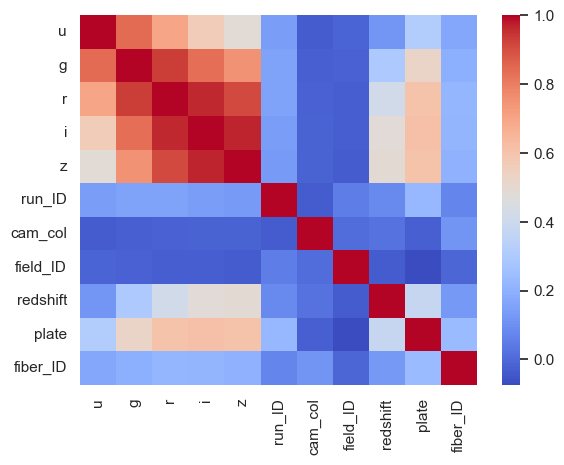

In [19]:
corr_df = df.drop(columns=['class']).corr()
sns.heatmap(corr_df, annot=False, cmap="coolwarm")
plt.show()

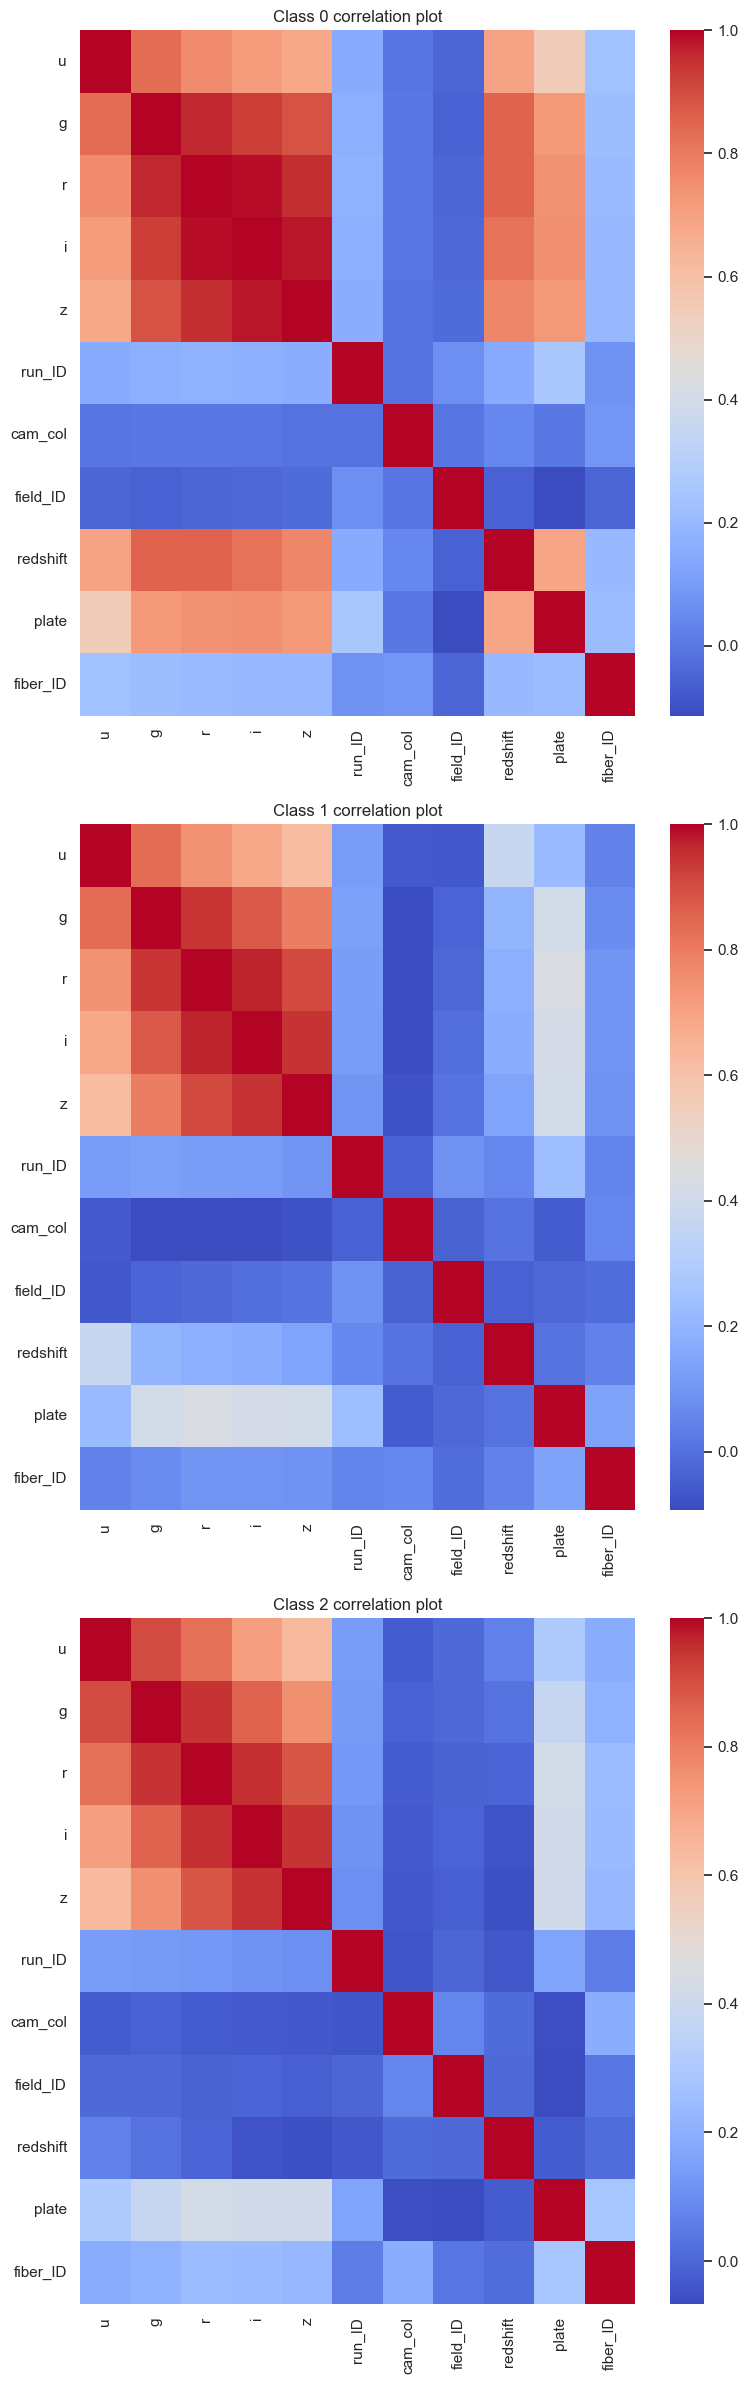

In [20]:
df0 = df[df['class'] == 0].drop(columns=['class'])
df1 = df[df['class'] == 1].drop(columns=['class'])
df2 = df[df['class'] == 2].drop(columns=['class'])
corr_df0 = df0.corr()
corr_df1 = df1.corr()
corr_df2 = df2.corr()

# Koreliacijų pagal klases grafikao

fig, axes = plt.subplots(3, 1, figsize=(8, 24))
sns.heatmap(corr_df0, ax=axes[0], annot=False, cmap="coolwarm")
axes[0].set_title("Class 0 correlation plot")
sns.heatmap(corr_df1, ax=axes[1], annot=False, cmap="coolwarm")
axes[1].set_title("Class 1 correlation plot")
sns.heatmap(corr_df2, ax=axes[2], annot=False, cmap="coolwarm")
axes[2].set_title("Class 2 correlation plot")
plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'redshift', 'plate', 'fiber_ID'],
      dtype='object')

### Normalization

In [18]:
# kiti masyvai nebuvo normalizuot, nes jie buvo pavadinimai, kampo laipsniai, kategorijos ar ID
normalization_cols = ['redshift', 'u', 'g', 'r', 'i', 'z']

dfn = df.copy()
dfminmax = df.copy()
for col in normalization_cols:
    dfn[col] = (dfn[col] - dfn[col].mean()) / dfn[col].std()
    #min-max normalization
    dfminmax[col] = (dfminmax[col] - dfminmax[col].min()) / (dfminmax[col].max() - dfminmax[col].min())

In [19]:
df.describe()

u           g           r           i           z      run_ID  \
count 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000   
mean    21.787896   20.502928   19.731253   19.275577   19.027352 4469.947333   
std      2.198386    1.972200    1.825397    1.761303    1.796109 2007.609453   
min     14.646170   11.474350   11.090690   10.956650   11.414840  109.000000   
25%     20.219030   19.105560   18.447560   18.087080   17.821105 2989.000000   
50%     21.757170   20.899525   20.181070   19.582485   19.224130 4135.000000   
75%     23.302923   21.872370   21.095725   20.632760   20.344770 5655.000000   
max     27.797830   27.144430   27.593320   23.800950   29.383740 8162.000000   

          cam_col    field_ID       class    redshift        plate    fiber_ID  
count 3000.000000 3000.000000 3000.000000 3000.000000  3000.000000 3000.000000  
mean     3.519667  183.947667    1.000000    0.704376  5419.990333  449.546667  
std      1.601187  143.659592    0.816633    0.893754  2996.155627  273.646086  
min      1.000000   11.000000    0.000000   -0.003401   293.000000    1.000000  
25%      2.000000   84.000000    0.000000    0.000056  2868.750000  224.000000  
50%      4.000000  147.000000    1.000000    0.416370  5287.500000  430.500000  
75%      5.000000  238.000000    2.000000    1.131846  7697.250000  649.000000  
max      6.000000  989.000000    2.000000    7.003870 12545.000000 1000.000000

In [20]:
dfn.describe()

u           g           r           i           z      run_ID  \
count 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000   
mean     0.000000   -0.000000    0.000000    0.000000    0.000000 4469.947333   
std      1.000000    1.000000    1.000000    1.000000    1.000000 2007.609453   
min     -3.248622   -4.577923   -4.733525   -4.723167   -4.238334  109.000000   
25%     -0.713644   -0.708533   -0.703240   -0.674783   -0.671589 2989.000000   
50%     -0.013977    0.201094    0.246421    0.174251    0.109558 4135.000000   
75%      0.689154    0.694373    0.747493    0.770557    0.733484 5655.000000   
max      2.733793    3.367561    4.307045    2.569333    5.766012 8162.000000   

          cam_col    field_ID       class    redshift        plate    fiber_ID  
count 3000.000000 3000.000000 3000.000000 3000.000000  3000.000000 3000.000000  
mean     3.519667  183.947667    1.000000    0.000000  5419.990333  449.546667  
std      1.601187  143.659592    0.816633    1.000000  2996.155627  273.646086  
min      1.000000   11.000000    0.000000   -0.791914   293.000000    1.000000  
25%      2.000000   84.000000    0.000000   -0.788046  2868.750000  224.000000  
50%      4.000000  147.000000    1.000000   -0.322243  5287.500000  430.500000  
75%      5.000000  238.000000    2.000000    0.478287  7697.250000  649.000000  
max      6.000000  989.000000    2.000000    7.048354 12545.000000 1000.000000

In [21]:
df.columns

Index(['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'redshift', 'plate', 'fiber_ID'],
      dtype='object')

In [22]:
dfminmax.describe()

u           g           r           i           z      run_ID  \
count 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000 3000.000000   
mean     0.543028    0.576167    0.523587    0.647675    0.423649 4469.947333   
std      0.167157    0.125858    0.110612    0.137127    0.099957 2007.609453   
min      0.000000    0.000000    0.000000    0.000000    0.000000  109.000000   
25%      0.423738    0.486992    0.445800    0.555144    0.356520 2989.000000   
50%      0.540692    0.601476    0.550844    0.671569    0.434600 4135.000000   
75%      0.658225    0.663559    0.606269    0.753339    0.496966 5655.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000 8162.000000   

          cam_col    field_ID       class    redshift        plate    fiber_ID  
count 3000.000000 3000.000000 3000.000000 3000.000000  3000.000000 3000.000000  
mean     3.519667  183.947667    1.000000    0.101006  5419.990333  449.546667  
std      1.601187  143.659592    0.816633    0.127547  2996.155627  273.646086  
min      1.000000   11.000000    0.000000    0.000000   293.000000    1.000000  
25%      2.000000   84.000000    0.000000    0.000493  2868.750000  224.000000  
50%      4.000000  147.000000    1.000000    0.059905  5287.500000  430.500000  
75%      5.000000  238.000000    2.000000    0.162010  7697.250000  649.000000  
max      6.000000  989.000000    2.000000    1.000000 12545.000000 1000.000000

## Visualisation

### PCA

In [71]:
feature_cols = ['u', 'g', 'r', 'i', 'z', 'redshift']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feature_cols].values)
pca_df = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2'])

In [83]:
# Explained variability per principal component
print(pca.explained_variance_ratio_)

[0.79527158 0.14804321]


<Figure size 640x480 with 0 Axes>

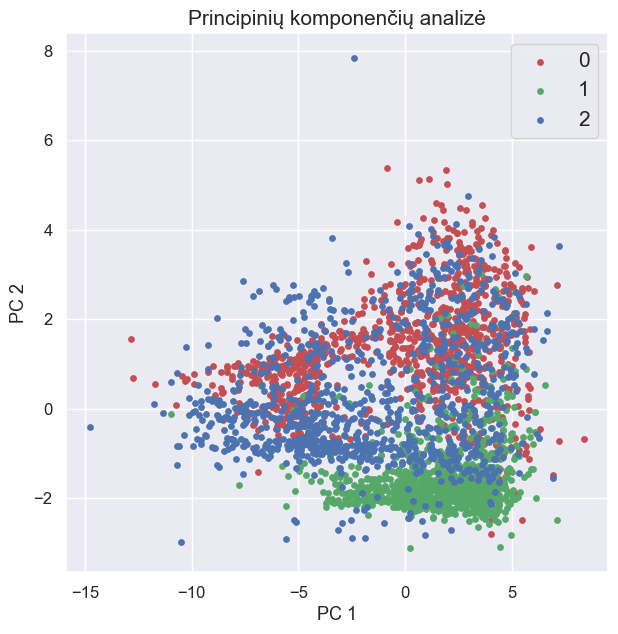

In [79]:
plt.figure()
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PC 1', fontsize=13)
plt.ylabel('PC 2', fontsize=13) 
plt.title("Principinių komponenčių analizė", fontsize=15)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['class'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 15)

plt.legend(targets,prop={'size': 15}) # 

In [80]:
# Fit PCA
pca.fit(df[feature_cols])
# create df for showing loadings
loadings_df = pd.DataFrame(pca.components_, columns=feature_cols, index=['PC1', 'PC2'])
loadings_df

u        g         r         i         z  redshift
PC1 0.449163 0.474751  0.460201  0.429496  0.409167  0.095887
PC2 0.743025 0.196483 -0.148082 -0.349596 -0.452531 -0.245721

### ISOMAP

In [44]:
df.columns

Index(['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'redshift', 'plate', 'fiber_ID'],
      dtype='object')

In [45]:
feature_cols = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'redshift', 'plate', 'fiber_ID']
isomap = manifold.Isomap(n_neighbors=4, n_components=2, n_jobs=-1)
data_isomap = isomap.fit_transform(dfminmax[feature_cols].values)

D:\Documents\anaconda3\envs\ml_vu\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\Documents\anaconda3\envs\ml_vu\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\Documents\anaconda3\envs\ml_vu\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\Documents\anaconda3\envs\ml_vu\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x

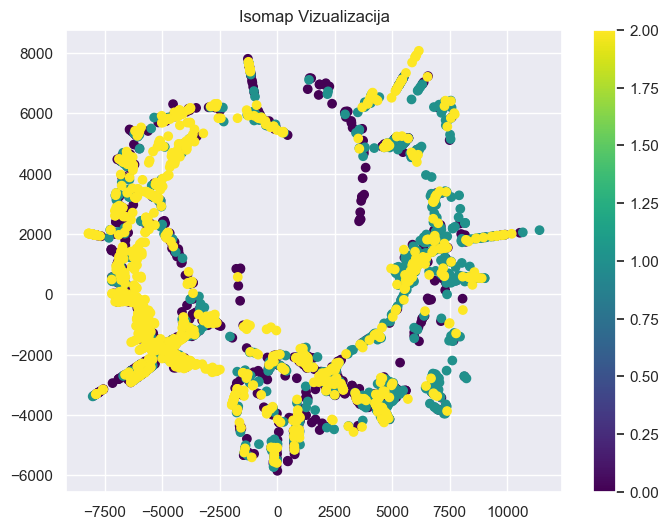

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(data_isomap[:, 0], data_isomap[:, 1], c=dfminmax['class'], cmap=plt.cm.viridis)
plt.title("Isomap Vizualizacija")
plt.colorbar()
plt.show()

### TSNE

##### n_iter increase

RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

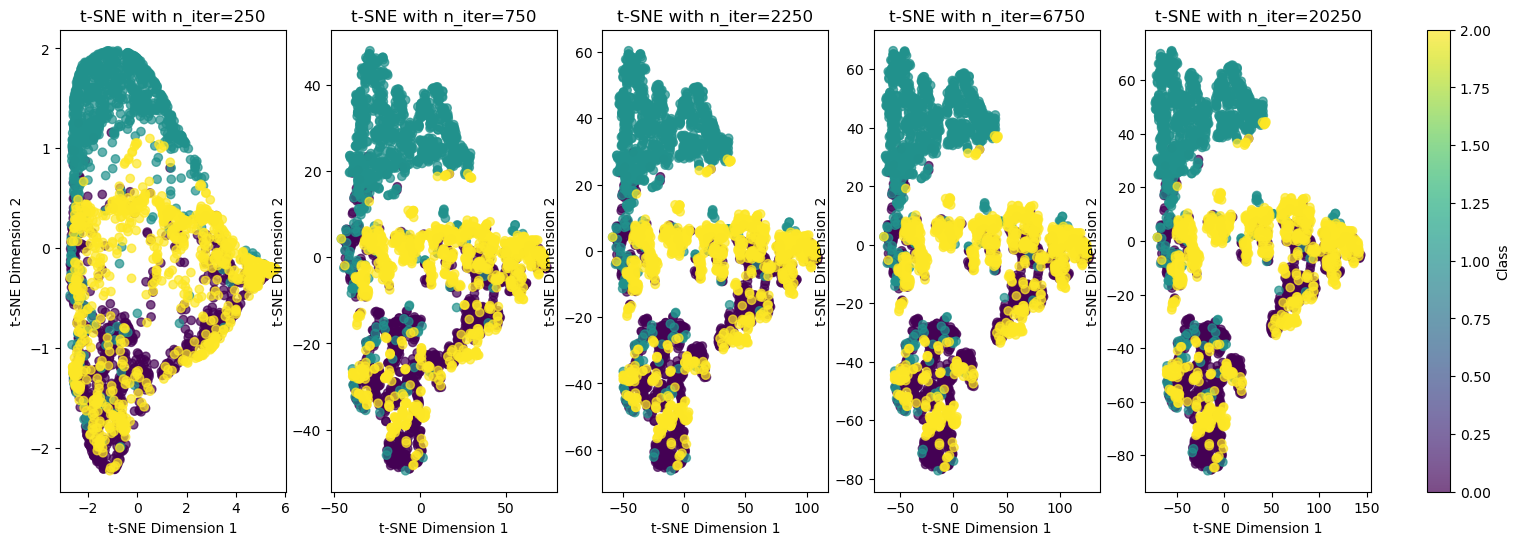

In [23]:
feature_cols = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'redshift', 'plate', 'fiber_ID']

initial_n_iter = 250
doublings = 4

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, doublings + 1, figsize=(18, 6), constrained_layout=True)

# Loop to apply t-SNE with increased perplexity values
for i in range(doublings + 1):
    n_iter = initial_n_iter * (3 ** i)
    tsne = manifold.TSNE(n_components=2, n_iter=n_iter, random_state=42)
    tsne_data = tsne.fit_transform(df[feature_cols].values)
    ax = axes[i]
    scatter = ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=pd.factorize(df['class'])[0], cmap=plt.cm.viridis, alpha=0.7)
    ax.set_title(f"t-SNE with n_iter={n_iter}")
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')

# Add a colorbar next to the entire figure to avoid overlapping
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Class')

plt.tight_layout()
plt.show()

##### perplexity increase

RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

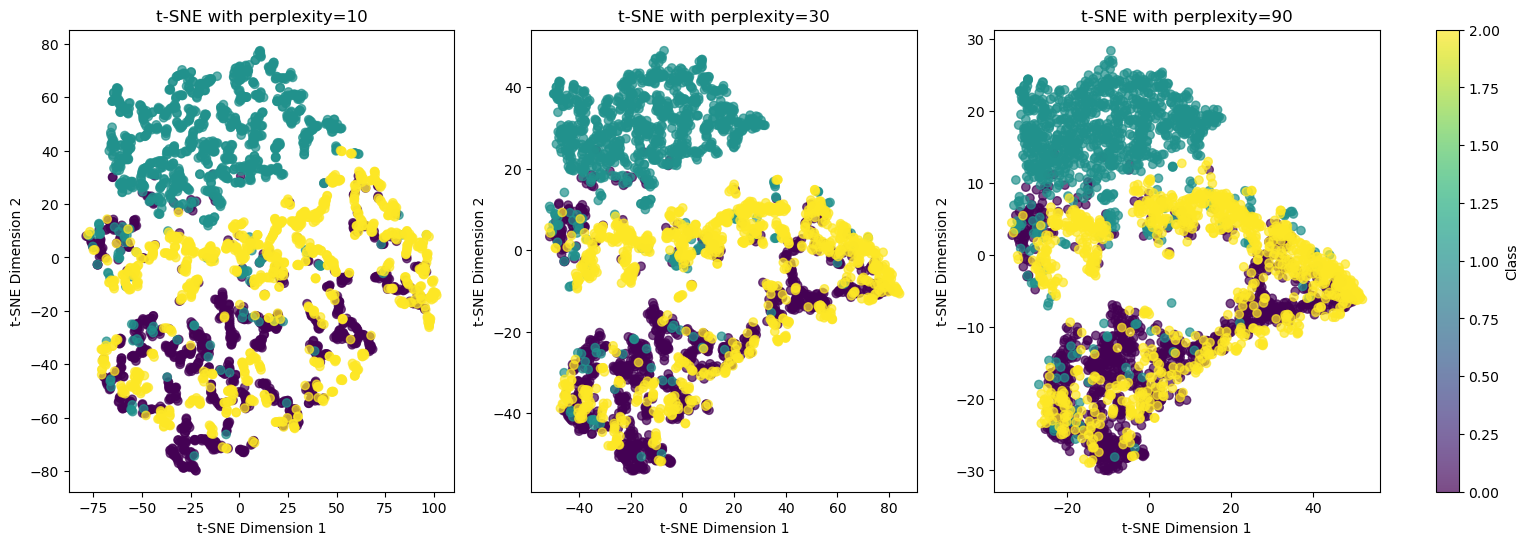

In [73]:
initial_perplexity = 10
doublings = 2

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, doublings + 1, figsize=(18, 6), constrained_layout=True)

# Loop to apply t-SNE with increased perplexity values
for i in range(doublings + 1):
    perplexity = initial_perplexity * (3 ** i)
    tsne = manifold.TSNE(n_components=2, n_iter=1000, random_state=42, perplexity=perplexity)
    tsne_data = tsne.fit_transform(df[feature_cols].values)
    ax = axes[i]
    scatter = ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=pd.factorize(df['class'])[0], cmap=plt.cm.viridis, alpha=0.7)
    ax.set_title(f"t-SNE with perplexity={perplexity}")
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')

# Add a colorbar next to the entire figure to avoid overlapping
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Class')

plt.tight_layout()
plt.show()

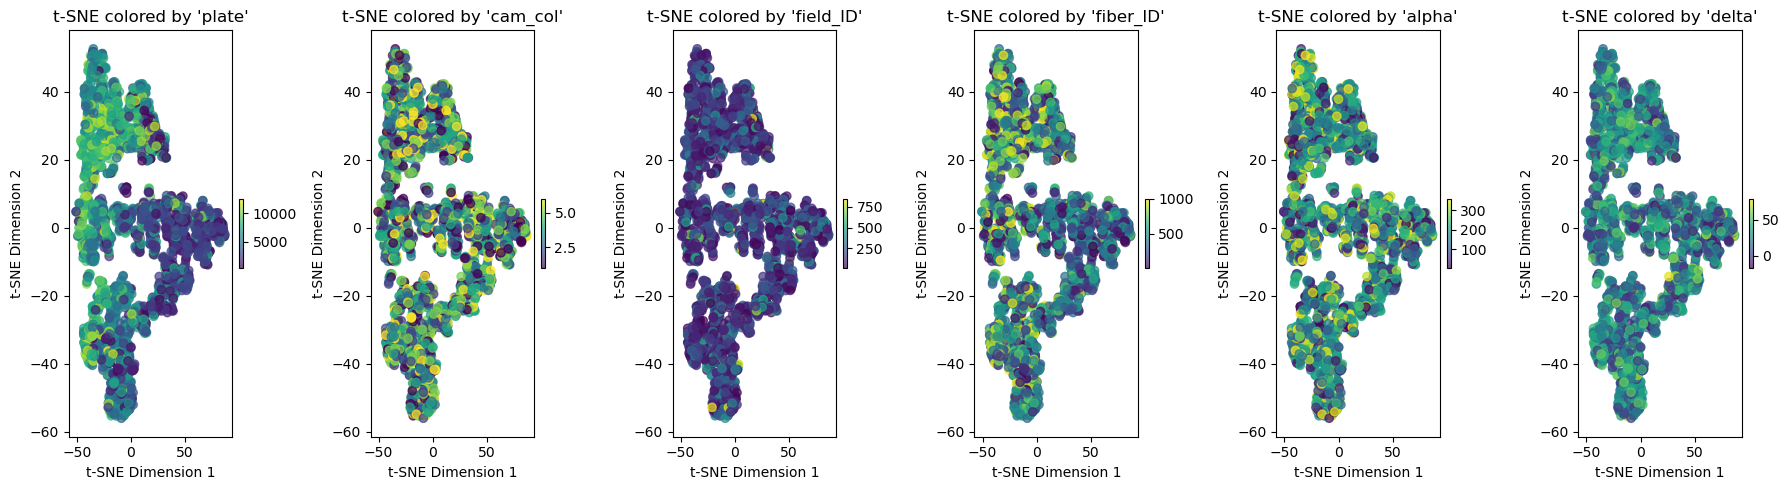

In [25]:
tsne = manifold.TSNE(n_components=2, n_iter=1000, random_state=1)
tsne_data = tsne.fit_transform(df[feature_cols].values)

# Save the t-SNE results into a DataFrame for easier plotting
df['tsne_dim1'] = tsne_data[:, 0]
df['tsne_dim2'] = tsne_data[:, 1]

# List of features to use for coloring
color_features = ['plate', 'cam_col', 'field_ID', 'fiber_ID', 'alpha', 'delta']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(color_features), figsize=(18, 5))

# Generate a scatter plot for each feature in 'color_features'
for ax, feature in zip(axes, color_features):
    scatter = ax.scatter(df['tsne_dim1'], df['tsne_dim2'], c=dfminmax[feature], cmap=plt.cm.viridis, alpha=0.7)
    ax.set_title(f"t-SNE colored by '{feature}'")
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()

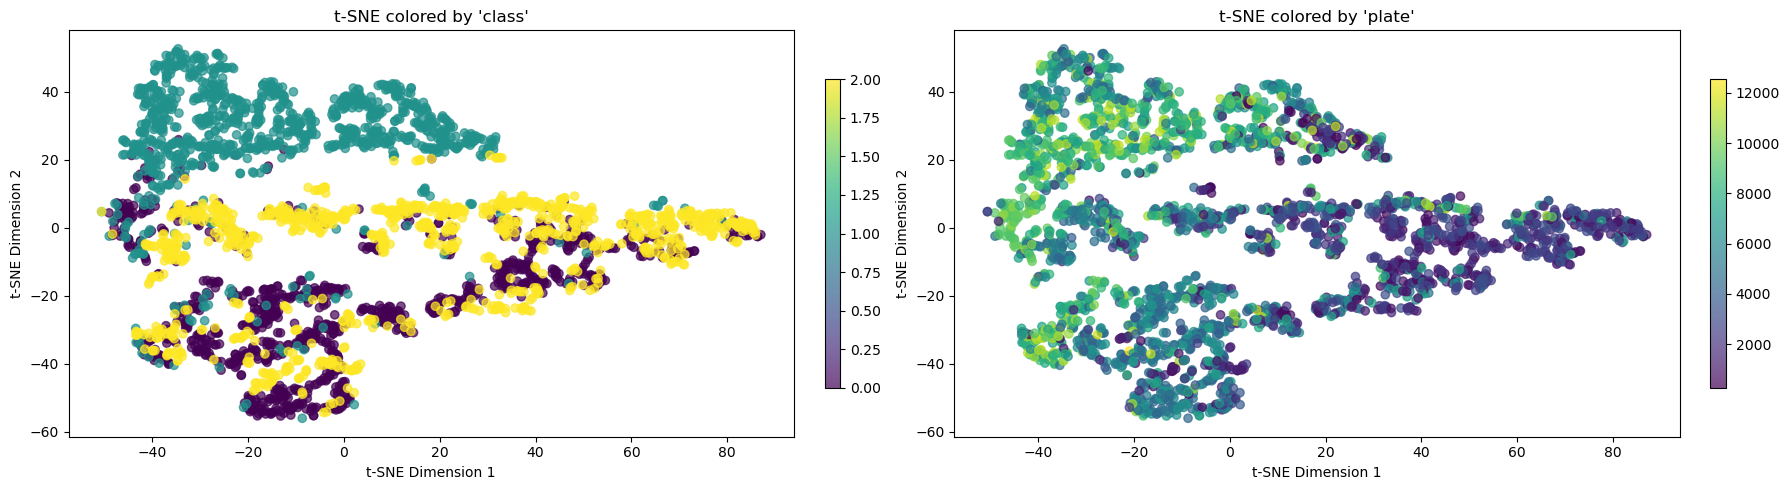

In [24]:
tsne = manifold.TSNE(n_components=2, n_iter=1000, random_state=100)
tsne_data = tsne.fit_transform(df[feature_cols].values)

# Save the t-SNE results into a DataFrame for easier plotting
df['tsne_dim1'] = tsne_data[:, 0]
df['tsne_dim2'] = tsne_data[:, 1]

# List of features to use for coloring
color_features = ['class', 'plate']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(color_features), figsize=(18, 5))

# Generate a scatter plot for each feature in 'color_features'
for ax, feature in zip(axes, color_features):
    scatter = ax.scatter(df['tsne_dim1'], df['tsne_dim2'], c=dfminmax[feature], cmap=plt.cm.viridis, alpha=0.7)
    ax.set_title(f"t-SNE colored by '{feature}'")
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()

# tsne = manifold.TSNE(n_components=2, n_iter=1000, random_state=42)
# tsne_data = tsne.fit_transform(df[feature_cols].values)
# plt.figure(figsize=(8, 6))
# plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dfminmax['u'], cmap=plt.cm.viridis)
# plt.title("TSNE Visualization")
# plt.colorbar()
# plt.show()

### UMAP

In [28]:
# Defining function which would plot UMAP model with default parameters with option to change them
# Choosing feature columns, which define characteristics of a cosmic object
feature_cols = ['u', 'g', 'r', 'i', 'z', 'redshift']
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', data=df):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(df[feature_cols]);
    
    # Define a color map and class labels
    colors = ['r', 'g', 'b']  # Red, green, and blue colors for the three classes
    class_labels = ['GALAKTIKA', 'KVAZARAS', 'ŽVAIGŽDĖ']
    cmap = mcolors.ListedColormap(colors)

    # Plot with custom colors for each class
    fig, ax = plt.subplots(figsize=(10, 7))
    scatter = ax.scatter(u[:, 0], u[:, 1], c=data['class'], cmap=cmap, s=15)
    plt.title(title, fontsize=16)

    plt.xlabel('UMAP 1', fontsize=14)
    plt.ylabel('UMAP 2', fontsize=14)
    
    # Create custom legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) 
                      for i in range(len(class_labels))]
    plt.legend(legend_handles, [f"({i}) {label}" for i, label in enumerate(class_labels)], title="Klasės")
    
    plt.show()

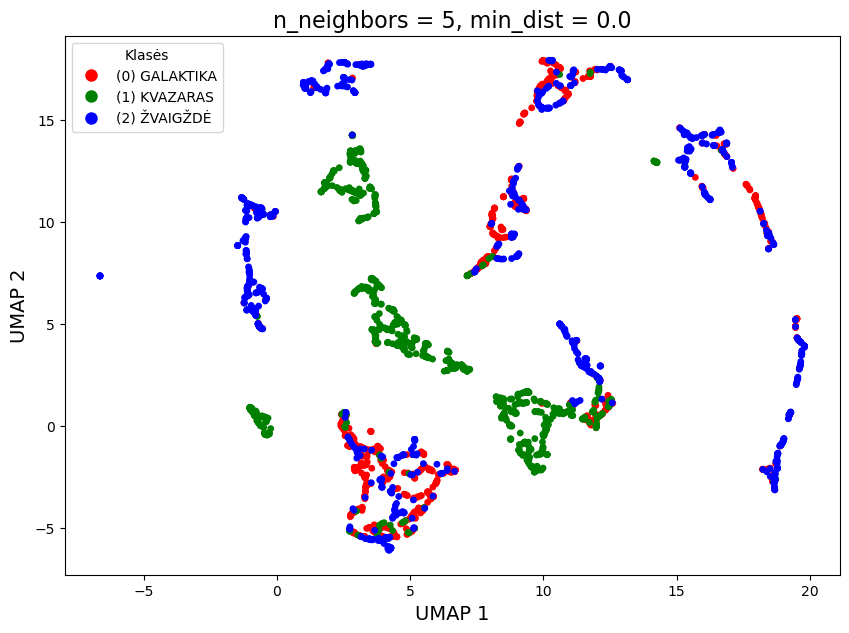

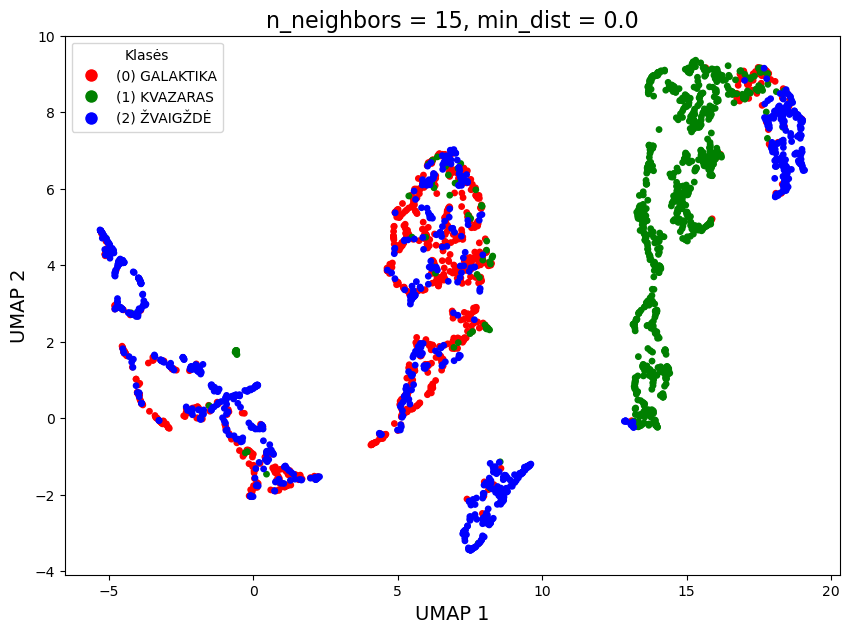

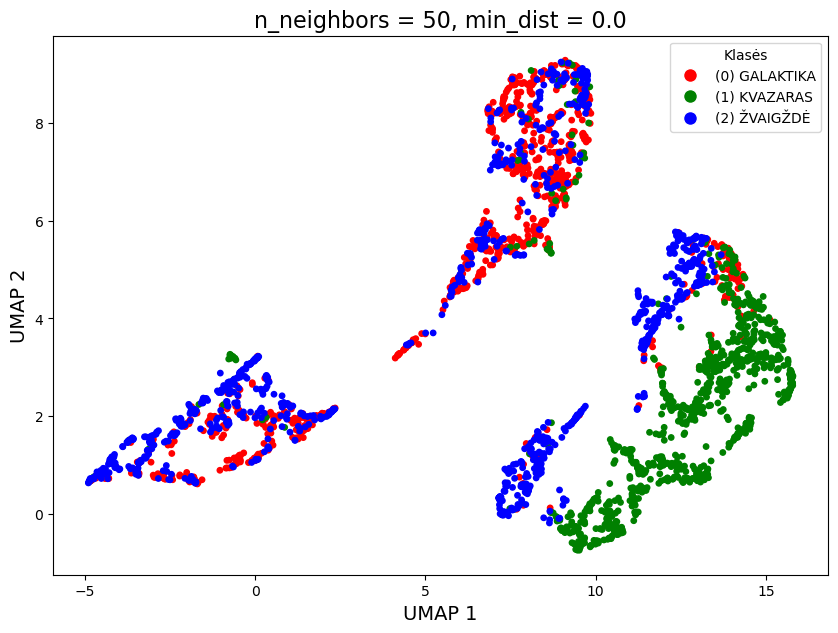

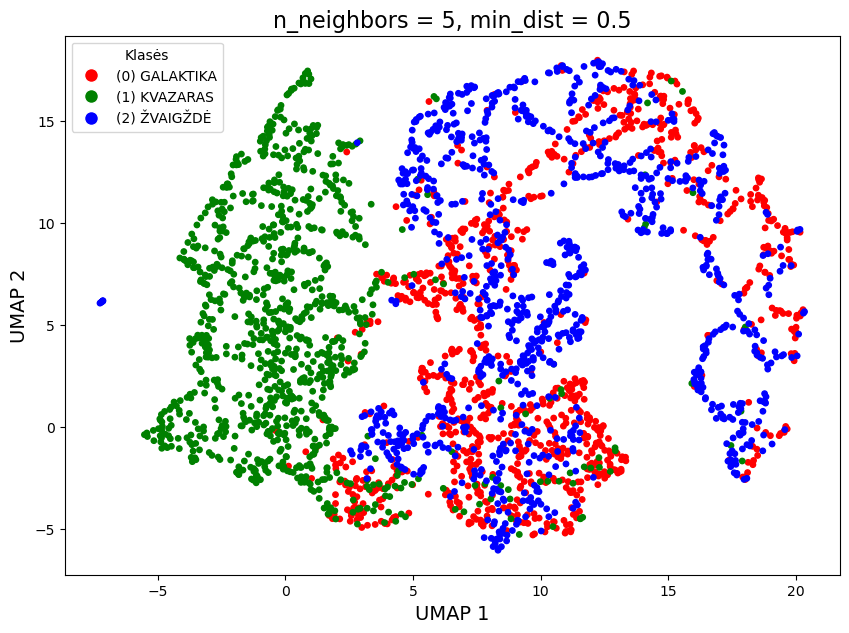

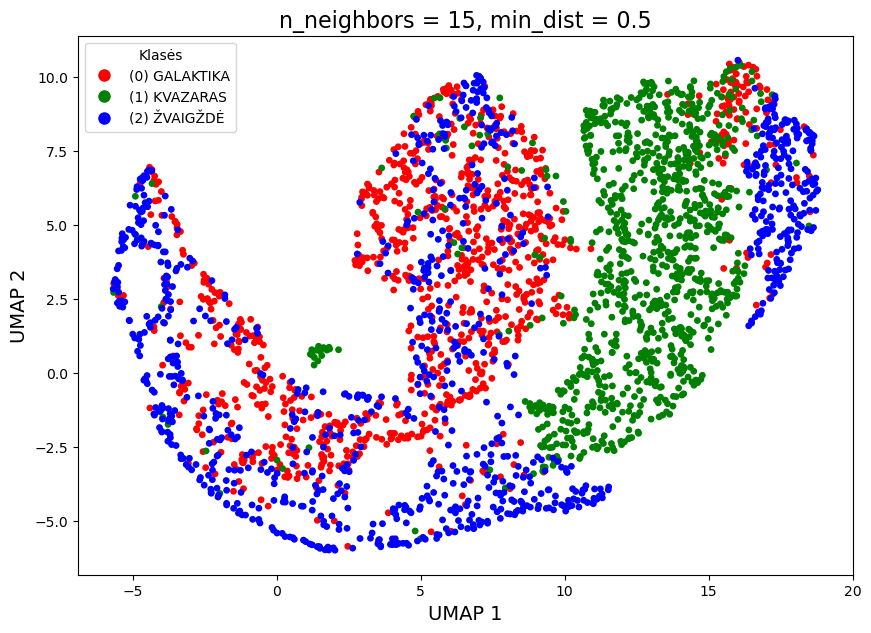

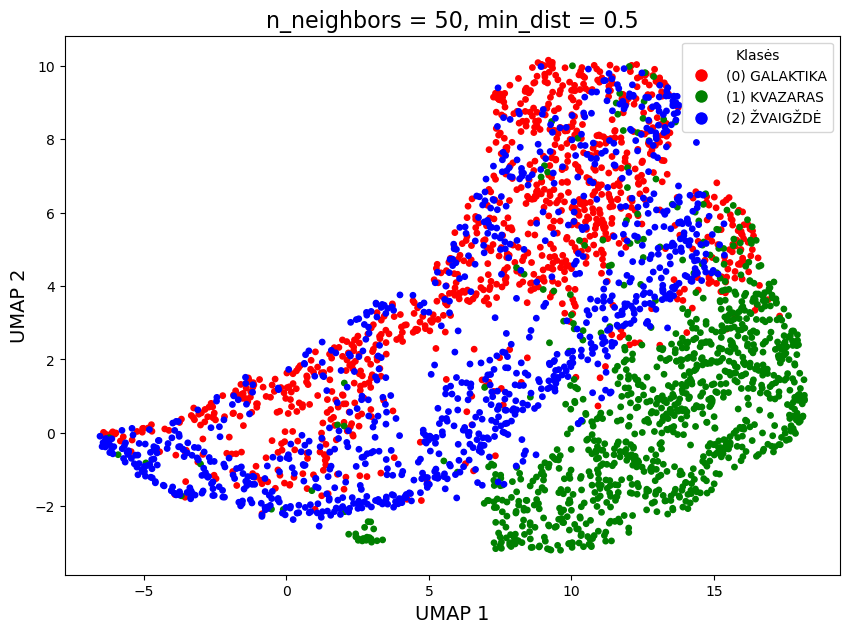

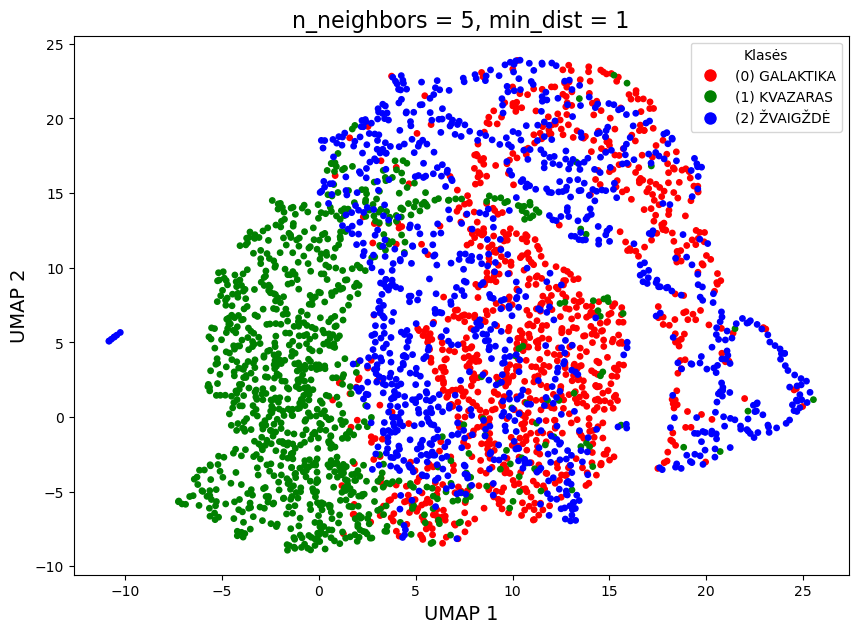

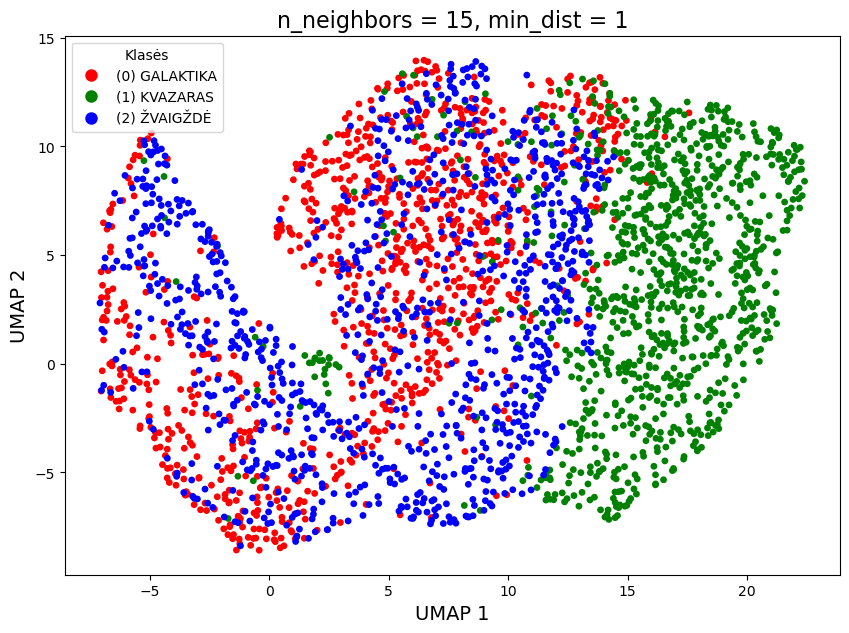

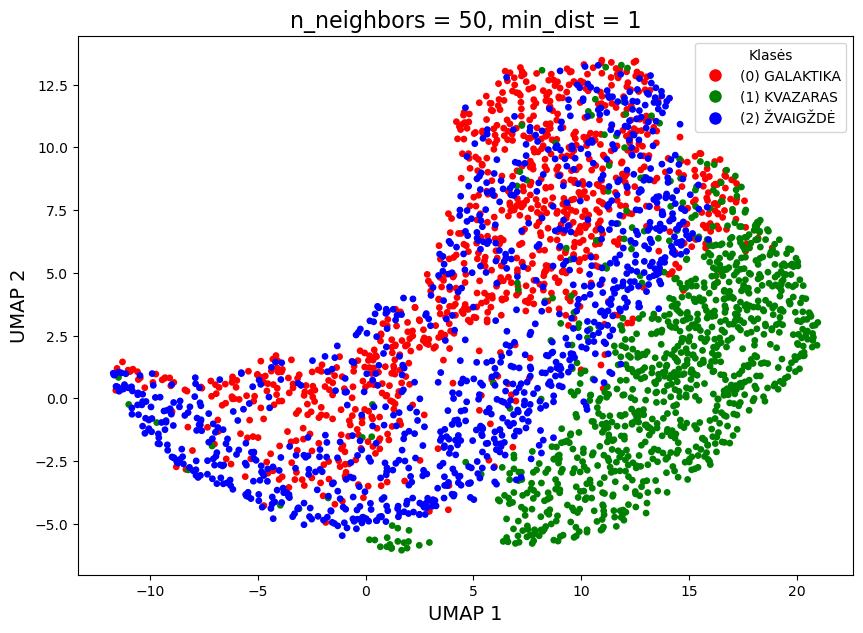

In [29]:
# for each of min distances 0, 0.5 and 1 take n_neighbors 5, 15 and 50 and draw umap graphs
for d in (0.0, 0.5, 1):
    for n in (5, 15, 50):
        draw_umap(n_neighbors=n, min_dist=d, title='n_neighbors = {}, min_dist = {}'.format(n, d), data=dfn)

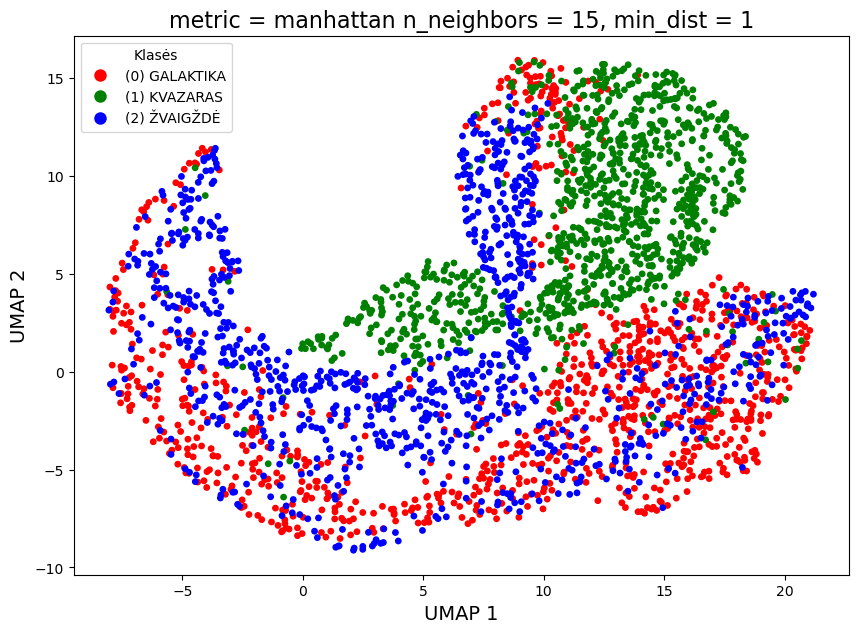

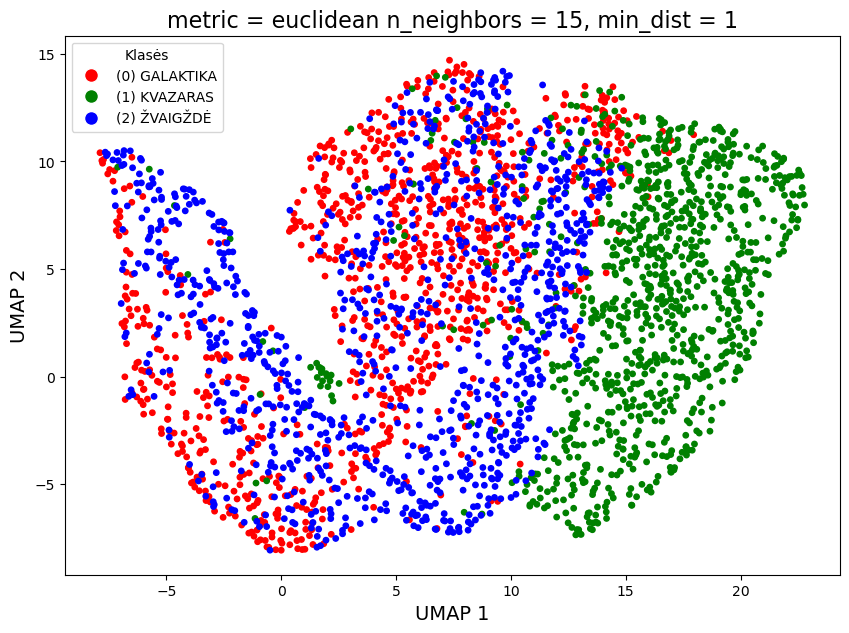


KeyboardInterrupt



In [34]:
for metric_s in ('manhattan', 'euclidean', 'cosine', 'correlation'):
    draw_umap(n_neighbors=15, min_dist=1, metric=metric_s, title='metric = {} n_neighbors = 15, min_dist = 1'.format(metric_s), data=dfn)

n_neighbors=15, min_dist=1, metric=cosine


<Axes: >

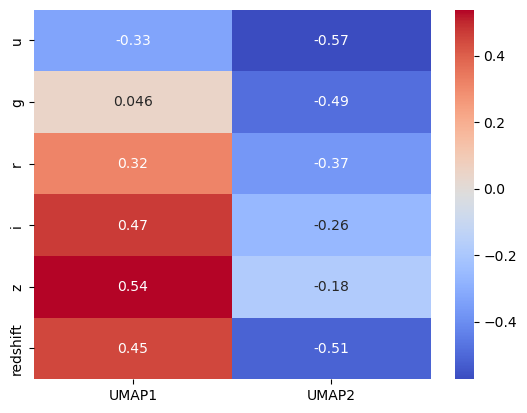

In [48]:
# Define UMAP model and get the embeddings
umap_model = umap.UMAP(n_neighbors=15, min_dist=1, n_components=2, metric='cosine')
umap_embedding = umap_model.fit_transform(df[feature_cols])

# DataFrame for the UMAP results and feature columns
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
features_df = df[feature_cols]

# Correlations between each feature and the UMAP axes
correlations = features_df.corrwith(umap_df['UMAP1']).to_frame(name='UMAP1')
correlations['UMAP2'] = features_df.corrwith(umap_df['UMAP2'])

print("n_neighbors=15, min_dist=1, metric=cosine")
sns.heatmap(correlations, annot=True, cmap="coolwarm")

n_neighbors=15, min_dist=1, metric=euclidean


<Axes: >

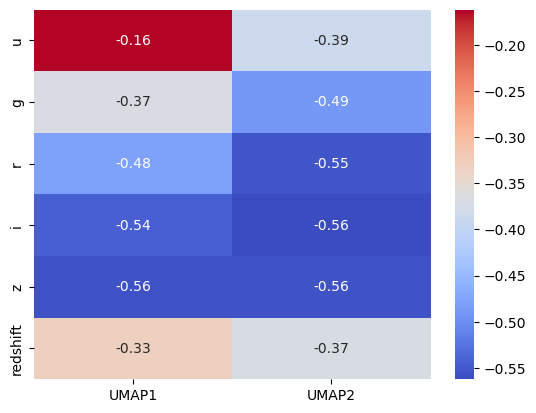

In [47]:
# Define UMAP model and get the embeddings
umap_model = umap.UMAP(n_neighbors=5, min_dist=1, n_components=2, metric='euclidean')
umap_embedding = umap_model.fit_transform(df[feature_cols])

# DataFrame for the UMAP results and feature columns
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
features_df = df[feature_cols]

# Correlations between each feature and the UMAP axes
correlations = features_df.corrwith(umap_df['UMAP1']).to_frame(name='UMAP1')
correlations['UMAP2'] = features_df.corrwith(umap_df['UMAP2'])

print("n_neighbors=15, min_dist=1, metric=euclidean")
sns.heatmap(correlations, annot=True, cmap="coolwarm")